<a href="https://colab.research.google.com/github/shreyas1209/Sudoku_Solver_App/blob/main/Sudoku_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all the libraries, models and images

In [1]:
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
image = cv2.imread('/content/gdrive/MyDrive/Sudoku/sample_sudoku.jpg')
image1 = cv2.imread('/content/gdrive/MyDrive/Sudoku/sample_sudoku_1.jpg')
image2 = cv2.imread('/content/gdrive/MyDrive/Sudoku/sample_sudoku_2.jpg')
image3 = cv2.imread('/content/gdrive/MyDrive/Sudoku/sample_sudoku_3.jpg')


In [4]:
import sys

sys.path.append('/content/gdrive/MyDrive/Sudoku/Models')
sys.path.append('/content/gdrive/MyDrive/Sudoku')



In [5]:
from sudoku_net import *

In [6]:
model1 = sudokunet1(output_classes=10)
model2 = sudokunet2(output_classes=10)
model3 = sudokunet3(output_classes=10)

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model1.load_state_dict(torch.load('/content/gdrive/MyDrive/Sudoku/model1_weights.pth', map_location="cuda:0")) #cuda:0
model1.to(device)
model2.load_state_dict(torch.load('/content/gdrive/MyDrive/Sudoku/model2_weights.pth', map_location="cuda:0")) #cuda:0
model2.to(device)
model3.load_state_dict(torch.load('/content/gdrive/MyDrive/Sudoku/model3_weights.pth', map_location="cuda:0")) #cuda:0
model3.to(device)


sudokunet3(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2304, out_features=256, bias=True)
  (dropout1): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (output): Linear(in_features=128, out_features=10, bias=True)
)

In [8]:
sudoku_template = cv2.imread('/content/gdrive/MyDrive/Sudoku/blank_sudoku.jpg')


In [9]:
from sudoku_detector import *
from sudoku_solver import *

image_preproccesor (img): Performs data preprocessing using functions from sudoku_detector

In [10]:
def image_preproccesor(img):
  pic = sudoku_detector(img)
  boundary = find_boundary(img,pic)
  crop = crop_and_warp(img,pic,boundary)

  return crop


digit_reader(image,img_size,grid_size,model1,model2,model3,show=True):Reads the digit using functions from sudoku_detector

In [11]:
def digit_reader(image,img_size,grid_size,model1,model2,model3,show=True):
  sudoku_array = []
  img = cv2.resize(image,img_size)
  cv2_imshow(img)
  for i in range(grid_size[0]):
    for j in range(grid_size[1]):
      digit = digit_extraction(img,(i,j),img_size,grid_size,extracted_img_size=(28,28),show = show)
      digit = torch.tensor(digit)
      blank_threshold = (torch.sum(digit))
      if blank_threshold <=(255*15):
        sudoku_array.append(0)
        if (show==True):
          print(torch.tensor([0]))
      else:
        digit = digit.reshape((1,1,28,28)).float()
      
        model1.eval()
        model2.eval()
        model3.eval()
        model1 = model1.to(device = device)
        model2 = model2.to(device = device)
        model3 = model3.to(device = device)
        digit = digit.to(device)
        digit_read =torch.tensor([0,0,0])
        digit_read[0] = predict(model1,digit)
        digit_read[1] = predict(model2,digit)
        digit_read[2] = predict(model3,digit)
        
        digit_final = torch.mode(digit_read)
        if (show ==True):
          print(digit_read)
          print(digit_final)
        sudoku_array.append(digit_final[0])
        
  sudoku_array = np.array(sudoku_array) 
  return (sudoku_array)
  
  

      

In [12]:
def print_sudoku_array(sudoku_array):
  
  sudoku_array = np.reshape(sudoku_array,(9,9))
  print(sudoku_array)
  


In [13]:
def sudoku_reader (image,model1,model2,model3,show = True):
  digit_read = digit_reader(image,(360,360),(9,9),model1,model2,model3,show=show)
  print_sudoku_array(digit_read)
  return(digit_read.reshape(9,9))

  

In [14]:
def solved_sudoku(sudoku_array,show = True):
  output = solve_sudoku(sudoku_array)
  if(output[0]==True):
    return(output[1])
  

In [15]:
def print_solved_sudoku(solved_sudoku_array,img,img_size = 360, boxes = 9):
  img= cv2. resize(sudoku_template,(img_size,img_size))
  div = img_size/boxes
  for i in range(9):
    for j in range(9):
      font = cv2.FONT_HERSHEY_SIMPLEX
      #bottomleft
      img = cv2.putText(img, str(solved_sudoku_array[j][i]) ,(int(10+div*i),int((div-10)+div*j)), font, 1,(0,0,0),2,cv2.LINE_AA)
  cv2_imshow(img)

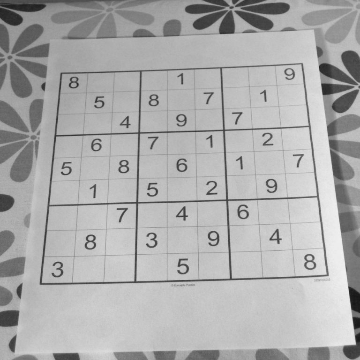

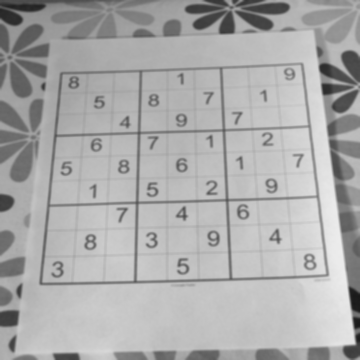

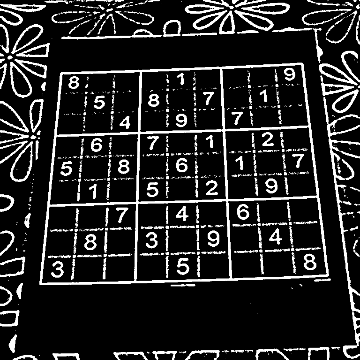

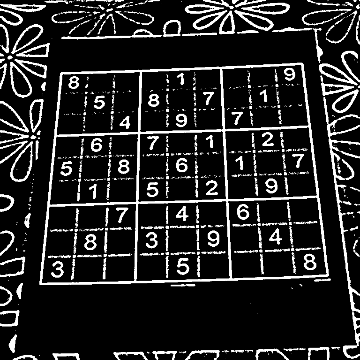

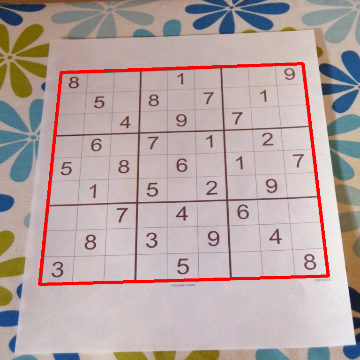

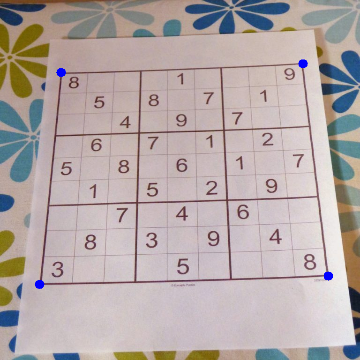

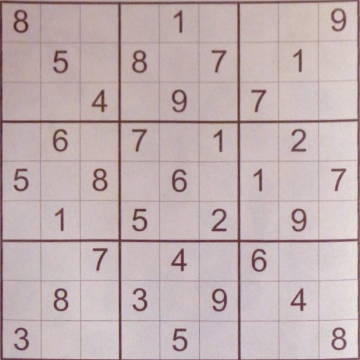

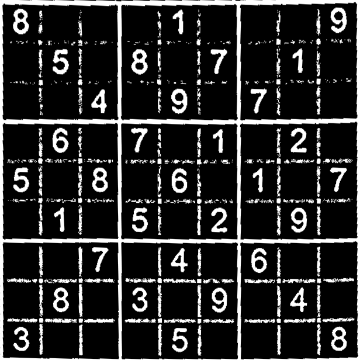

In [16]:
img = image_preproccesor(image)

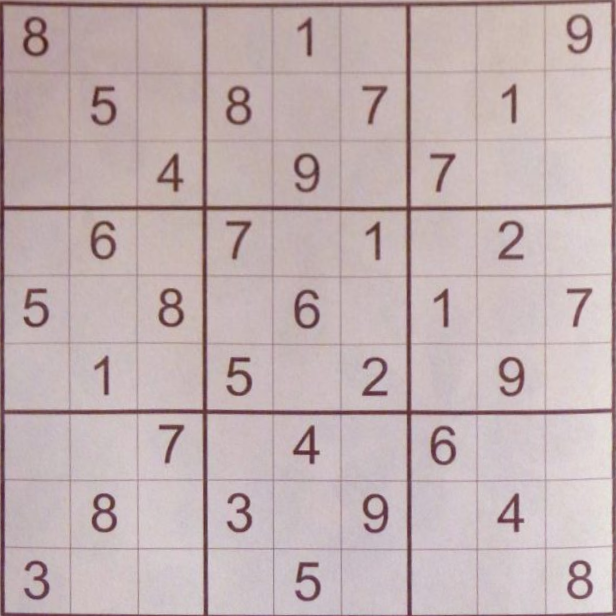

In [17]:
cv2_imshow(img[0])

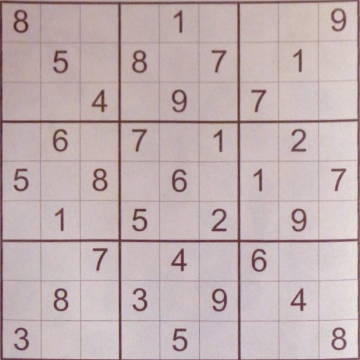

tensor([8, 8, 8])
torch.return_types.mode(
values=tensor(8),
indices=tensor(2))


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/content/gdrive/MyDrive/Sudoku/Models/sudoku_net.py:40: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)
/content/gdrive/MyDrive/Sudoku/Models/sudoku_net.py:75: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)
/content/gdrive/MyDrive/Sudoku/Models/sudoku_net.py:109: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([0])


tensor([0])


tensor([0])


tensor([1, 1, 1])
torch.return_types.mode(
values=tensor(1),
indices=tensor(2))


tensor([0])


tensor([0])


tensor([0])


tensor([9, 9, 9])
torch.return_types.mode(
values=tensor(9),
indices=tensor(2))


tensor([0])


tensor([5, 5, 5])
torch.return_types.mode(
values=tensor(5),
indices=tensor(2))


tensor([0])


tensor([8, 8, 8])
torch.return_types.mode(
values=tensor(8),
indices=tensor(2))


tensor([0])


tensor([7, 7, 7])
torch.return_types.mode(
values=tensor(7),
indices=tensor(2))


tensor([0])


tensor([1, 1, 1])
torch.return_types.mode(
values=tensor(1),
indices=tensor(2))


tensor([0])


tensor([0])


tensor([0])


tensor([4, 4, 4])
torch.return_types.mode(
values=tensor(4),
indices=tensor(2))


tensor([0])


tensor([9, 9, 9])
torch.return_types.mode(
values=tensor(9),
indices=tensor(2))


tensor([0])


tensor([7, 7, 7])
torch.return_types.mode(
values=tensor(7),
indices=tensor(2))


tensor([0])


tensor([0])


tensor([0])


tensor([6, 6, 6])
torch.return_types.mode(
values=tensor(6),
indices=tensor(2))


tensor([0])


tensor([7, 7, 7])
torch.return_types.mode(
values=tensor(7),
indices=tensor(2))


tensor([0])


tensor([1, 1, 1])
torch.return_types.mode(
values=tensor(1),
indices=tensor(2))


tensor([0])


tensor([2, 2, 2])
torch.return_types.mode(
values=tensor(2),
indices=tensor(2))


tensor([0])


tensor([5, 5, 5])
torch.return_types.mode(
values=tensor(5),
indices=tensor(2))


tensor([0])


tensor([8, 8, 8])
torch.return_types.mode(
values=tensor(8),
indices=tensor(2))


tensor([0])


tensor([6, 6, 6])
torch.return_types.mode(
values=tensor(6),
indices=tensor(2))


tensor([0])


tensor([1, 1, 1])
torch.return_types.mode(
values=tensor(1),
indices=tensor(2))


tensor([0])


tensor([7, 7, 7])
torch.return_types.mode(
values=tensor(7),
indices=tensor(2))


tensor([0])


tensor([1, 1, 1])
torch.return_types.mode(
values=tensor(1),
indices=tensor(2))


tensor([0])


tensor([5, 5, 5])
torch.return_types.mode(
values=tensor(5),
indices=tensor(2))


tensor([0])


tensor([2, 2, 2])
torch.return_types.mode(
values=tensor(2),
indices=tensor(2))


tensor([0])


tensor([9, 9, 9])
torch.return_types.mode(
values=tensor(9),
indices=tensor(2))


tensor([0])


tensor([0])


tensor([0])


tensor([7, 7, 7])
torch.return_types.mode(
values=tensor(7),
indices=tensor(2))


tensor([0])


tensor([4, 4, 4])
torch.return_types.mode(
values=tensor(4),
indices=tensor(2))


tensor([0])


tensor([6, 6, 6])
torch.return_types.mode(
values=tensor(6),
indices=tensor(2))


tensor([0])


tensor([0])


tensor([0])


tensor([8, 8, 8])
torch.return_types.mode(
values=tensor(8),
indices=tensor(2))


tensor([0])


tensor([3, 3, 3])
torch.return_types.mode(
values=tensor(3),
indices=tensor(2))


tensor([0])


tensor([9, 9, 9])
torch.return_types.mode(
values=tensor(9),
indices=tensor(2))


tensor([0])


tensor([4, 4, 4])
torch.return_types.mode(
values=tensor(4),
indices=tensor(2))


tensor([0])


tensor([3, 3, 3])
torch.return_types.mode(
values=tensor(3),
indices=tensor(2))


tensor([0])


tensor([0])


tensor([0])


tensor([5, 5, 5])
torch.return_types.mode(
values=tensor(5),
indices=tensor(2))


tensor([0])


tensor([0])


tensor([0])


tensor([8, 8, 8])
torch.return_types.mode(
values=tensor(8),
indices=tensor(2))
[[8 0 0 0 1 0 0 0 9]
 [0 5 0 8 0 7 0 1 0]
 [0 0 4 0 9 0 7 0 0]
 [0 6 0 7 0 1 0 2 0]
 [5 0 8 0 6 0 1 0 7]
 [0 1 0 5 0 2 0 9 0]
 [0 0 7 0 4 0 6 0 0]
 [0 8 0 3 0 9 0 4 0]
 [3 0 0 0 5 0 0 0 8]]


In [18]:
sudoku_read = sudoku_reader(img[0],model1,model2,model3,show = True)

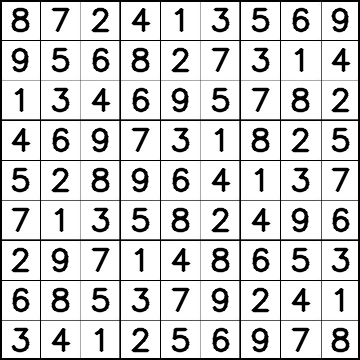

In [19]:
print_solved_sudoku((solved_sudoku(sudoku_read)),sudoku_template,img_size = 360, boxes = 9)

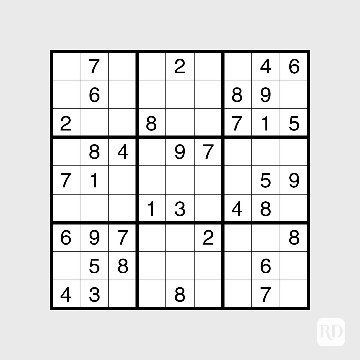

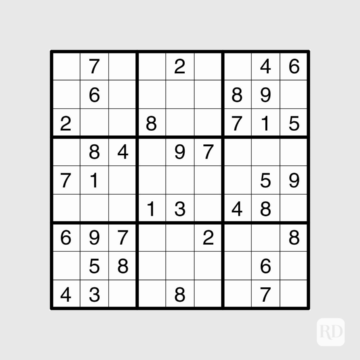

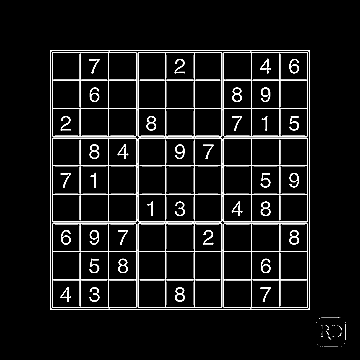

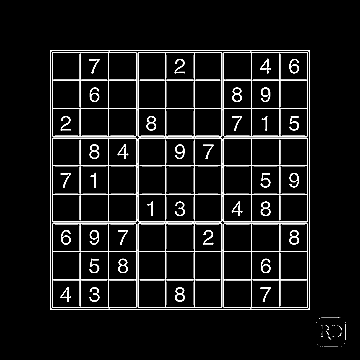

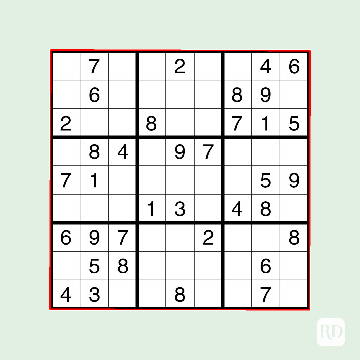

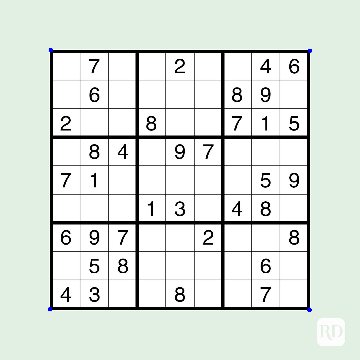

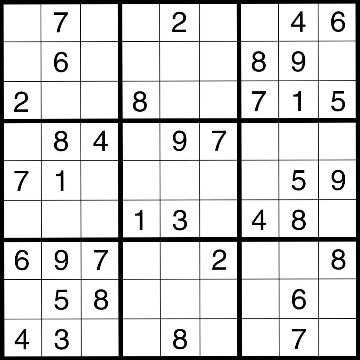

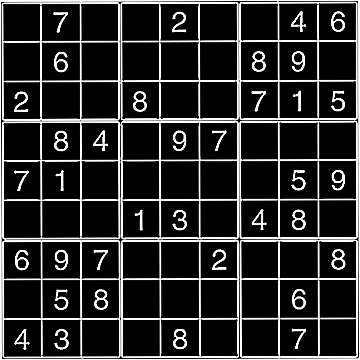

In [20]:
img1 = image_preproccesor(image1)

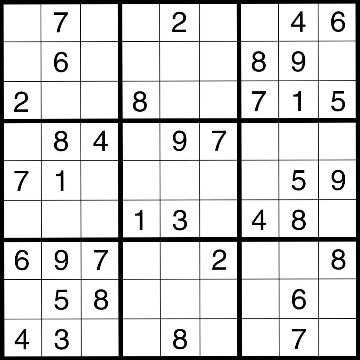

[[0 7 0 0 2 0 0 4 6]
 [0 6 0 0 0 0 8 9 0]
 [2 0 0 8 0 0 7 1 5]
 [0 8 4 0 9 7 0 0 0]
 [7 1 0 0 0 0 0 5 9]
 [0 0 0 1 3 0 4 8 0]
 [6 9 7 0 0 2 0 0 8]
 [0 5 8 0 0 0 0 6 0]
 [4 3 0 0 8 0 0 7 0]]


/content/gdrive/MyDrive/Sudoku/Models/sudoku_net.py:40: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)
/content/gdrive/MyDrive/Sudoku/Models/sudoku_net.py:75: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)
/content/gdrive/MyDrive/Sudoku/Models/sudoku_net.py:109: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


In [21]:
sudoku1_read = sudoku_reader(img1[0],model1,model2,model3,show=False)

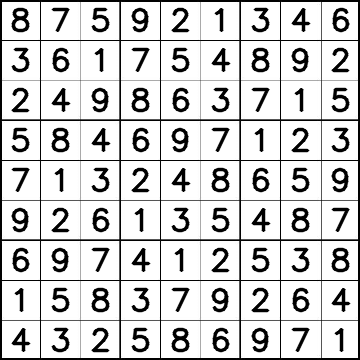

In [22]:
print_solved_sudoku((solved_sudoku(sudoku1_read)),sudoku_template,img_size = 360, boxes = 9)

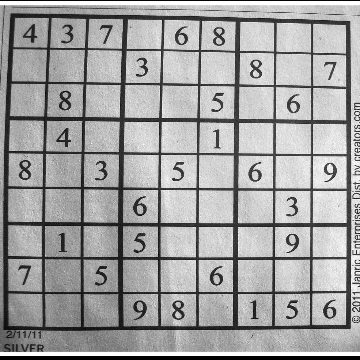

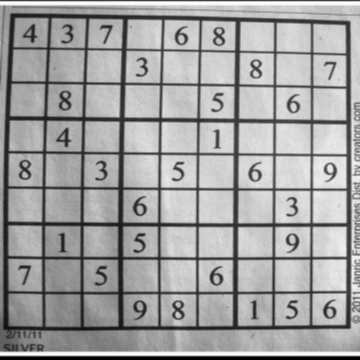

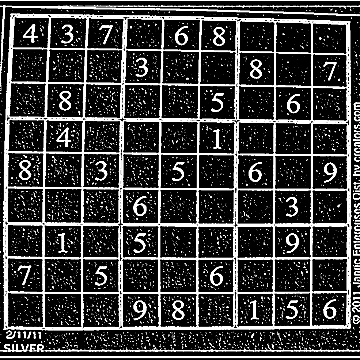

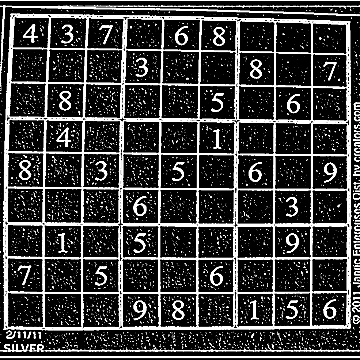

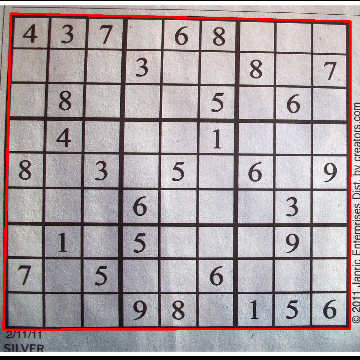

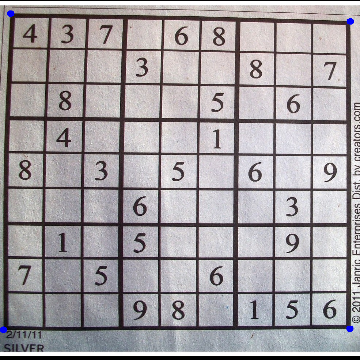

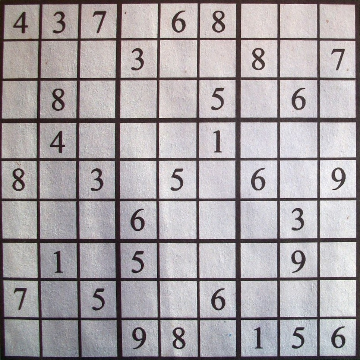

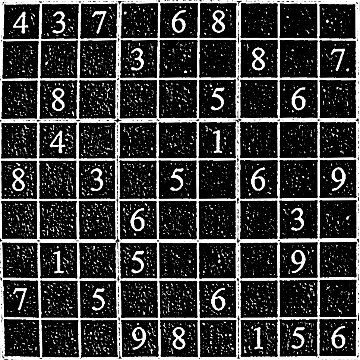

In [23]:
img2 = image_preproccesor(image3)

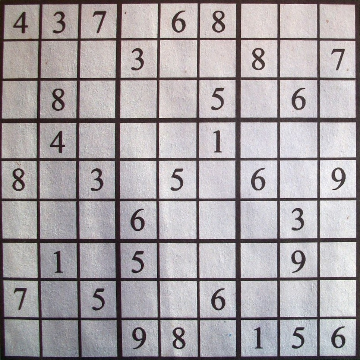

[[4 3 7 0 6 8 0 0 0]
 [0 0 0 3 0 0 8 0 7]
 [0 8 0 0 0 5 0 6 0]
 [0 4 0 0 0 1 0 0 0]
 [8 0 3 0 5 0 6 0 9]
 [0 0 0 6 0 0 0 3 0]
 [0 1 0 5 0 0 0 9 0]
 [7 0 5 0 0 6 0 0 0]
 [0 0 0 9 8 0 1 5 6]]


/content/gdrive/MyDrive/Sudoku/Models/sudoku_net.py:40: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)
/content/gdrive/MyDrive/Sudoku/Models/sudoku_net.py:75: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)
/content/gdrive/MyDrive/Sudoku/Models/sudoku_net.py:109: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


In [24]:
sudoku2_read = sudoku_reader(img2[0],model1,model2,model3,show=False)

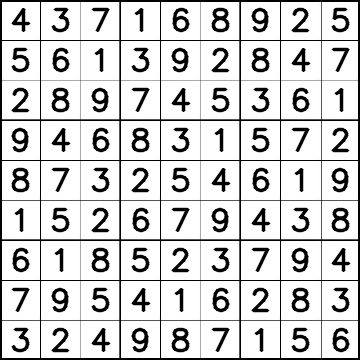

In [25]:
print_solved_sudoku((solved_sudoku(sudoku2_read)),sudoku_template,img_size = 360, boxes = 9)